In [2]:
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

zip_path = tensorflow.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [3]:
# 결측치확인
df = df.drop("Tpot (K)", axis=1)
print("결측치 수:", df.isnull().sum().sum())
# 중복데이터 확인
print("중복데이터 수:", df.duplicated().sum())
display(df[df.duplicated()])
display(df[df["Date Time"] == "01.07.2010 00:20:00"])
df.drop_duplicates(inplace=True)
print("중복데이터 수:", df.duplicated().sum())
# 이상치 확인 후 수정
print(df["wv (m/s)"].min())
df["wv (m/s)"][df["wv (m/s)"] == -9999.0] = 0
df["max. wv (m/s)"][df["max. wv (m/s)"] == -9999.0] = 0

결측치 수: 0
중복데이터 수: 24


,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
78767,01.07.2010 00:20:00,992.02,17.82,14.03,78.50,20.44,16.04,4.39,10.12,16.17,1180.38,0.23,0.48,52.64
78773,01.07.2010 01:20:00,991.85,16.90,13.74,81.60,19.28,15.74,3.55,9.93,15.87,1184.06,1.21,1.76,239.50
78779,01.07.2010 02:20:00,991.53,16.23,13.58,84.30,18.48,15.58,2.90,9.83,15.71,1186.49,0.44,1.14,227.90
78785,01.07.2010 03:20:00,991.20,15.39,13.24,87.00,17.51,15.24,2.28,9.62,15.37,1189.70,1.35,1.88,201.40
78791,01.07.2010 04:20:00,991.09,14.87,12.94,88.20,16.94,14.94,2.00,9.43,15.07,1191.85,0.46,0.78,82.30
78797,01.07.2010 05:20:00,991.16,16.00,13.15,83.20,18.21,15.15,3.06,9.56,15.29,1187.18,0.77,1.08,163.50
78803,01.07.2010 06:20:00,991.05,18.24,13.53,74.00,20.99,15.53,5.46,9.80,15.67,1177.75,0.58,1.04,86.90
78809,01.07.2010 07:20:00,991.32,19.46,13.98,70.60,22.65,15.99,6.66,10.09,16.13,1172.96,1.51,2.96,44.23
78815,01.07.2010 08:20:00,991.03,21.48,14.29,63.60,25.65,16.32,9.34,10.30,16.46,1164.43,1.93,3.08,50.90
78821,01.07.2010 09:20:00,990.74,23.85,15.09,58.00,29.62,17.18,12.44,10.86,17.34,1154.41,0.93,2.00,205.90


,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
78623,01.07.2010 00:20:00,992.02,17.82,14.03,78.5,20.44,16.04,4.39,10.12,16.17,1180.38,0.23,0.48,52.64
78767,01.07.2010 00:20:00,992.02,17.82,14.03,78.5,20.44,16.04,4.39,10.12,16.17,1180.38,0.23,0.48,52.64


중복데이터 수: 0
-9999.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4100\1822124275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wv (m/s)"][df["wv (m/s)"] == -9999.0] = 0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4100\1822124275.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["max. wv (m/s)"][df["max. wv (m/s)"] == -9999.0] = 0


In [4]:
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")
df.set_index("Date Time", inplace=True)
display(df.head())
# input, target 분리
target = df["T (degC)"]
input = df[['Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'rho (g/m**3)', "T (degC)"]]


,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
display(input.head())
display(target.head())

,Tdew (degC),rh (%),VPmax (mbar),rho (g/m**3),T (degC)
Date Time,,,,,
2009-01-01 01:00:00,-8.78,94.4,3.33,1307.86,-8.05
2009-01-01 02:00:00,-9.77,93.2,3.12,1312.25,-8.88
2009-01-01 03:00:00,-9.66,93.5,3.13,1312.18,-8.81
2009-01-01 04:00:00,-10.02,92.6,3.07,1313.61,-9.05
2009-01-01 05:00:00,-10.65,92.2,2.94,1317.19,-9.63


Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
Name: T (degC), dtype: float64

In [6]:
num_data = len(target)
print("num_data:", num_data)
time_step = 10
num_time_data = num_data - time_step
print("num_time_data:", num_time_data)
test_size = 0.3
num_test = int(np.ceil((num_time_data) * 0.3))
print("num_test:", num_test)
num_train = num_time_data - num_test
print("num_train:", num_train)
train_index = num_train + 7
print("train_index:", train_index)
print()

num_data: 70067
num_time_data: 70057
num_test: 21018
num_train: 49039
train_index: 49046



In [7]:
#표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(input[:49049])
input_ss = ss.transform(input)
input_ss.shape

(70067, 5)

In [8]:
# 타임 데이터 구축
def split_xy(input, target, time_step):
    x, y = [], []
    for i in range(len(target)):
        end_time = i + time_step
        if end_time >= len(target):
            break
        x_temp = input[i:end_time]
        y_temp = target[end_time]
        x.append(x_temp)
        y.append(y_temp)
    return np.array(x), np.array(y)

x, y = split_xy(input_ss, target, time_step)
print(x.shape, y.shape)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4100\751469987.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_temp = target[end_time]


(70057, 10, 5) (70057,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=False, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49039, 10, 5), (21018, 10, 5), (49039,), (21018,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input((time_step, X_train.shape[2])))
model.add(GRU(128, activation="tanh", return_sequences=True))
model.add(GRU(128, activation="tanh"))
model.add(Dense(128))
model.add(Dense(1))
model.compile(loss="mse", optimizer=Adam(lr=0.0005), metrics=["mae"])
mc = ModelCheckpoint(filepath="best_model.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(patience=3)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=100, epochs=20, callbacks=[es, mc])

Epoch 1/20



392/393 [============================>.] - ETA: 0s - loss: 6.2952 - mae: 1.2244
Epoch 1: val_loss improved from inf to 0.72114, saving model to best_model.hdf5
393/393 [==============================] - 15s 25ms/step - loss: 6.2916 - mae: 1.2240 - val_loss: 0.7211 - val_mae: 0.6152
Epoch 2/20
  7/393 [..............................] - ETA: 7s - loss: 0.7288 - mae: 0.5909

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


393/393 [==============================] - ETA: 0s - loss: 0.6531 - mae: 0.5644
Epoch 2: val_loss improved from 0.72114 to 0.66555, saving model to best_model.hdf5
393/393 [==============================] - 9s 23ms/step - loss: 0.6531 - mae: 0.5644 - val_loss: 0.6655 - val_mae: 0.5687
Epoch 3/20
391/393 [============================>.] - ETA: 0s - loss: 0.6234 - mae: 0.5504
Epoch 3: val_loss improved from 0.66555 to 0.63248, saving model to best_model.hdf5
393/393 [==============================] - 9s 23ms/step - loss: 0.6237 - mae: 0.5505 - val_loss: 0.6325 - val_mae: 0.5510
Epoch 4/20
392/393 [============================>.] - ETA: 0s - loss: 0.6232 - mae: 0.5510
Epoch 4: val_loss did not improve from 0.63248
393/393 [==============================] - 9s 23ms/step - loss: 0.6230 - mae: 0.5509 - val_loss: 0.6735 - val_mae: 0.5828
Epoch 5/20
391/393 [============================>.] - ETA: 0s - loss: 0.6118 - mae: 0.5433
Epoch 5: val_loss did not improve from 0.63248
393/393 [==========

In [11]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.hdf5")
best_model.evaluate(X_test, y_test)

657/657 [==============================] - 5s 6ms/step - loss: 0.5545 - mae: 0.5139


[0.5544702410697937, 0.5139329433441162]

In [12]:
from sklearn.metrics import r2_score

r2_score(y_test, best_model.predict(X_test))

657/657 [==============================] - 4s 5ms/step


0.990885150129147

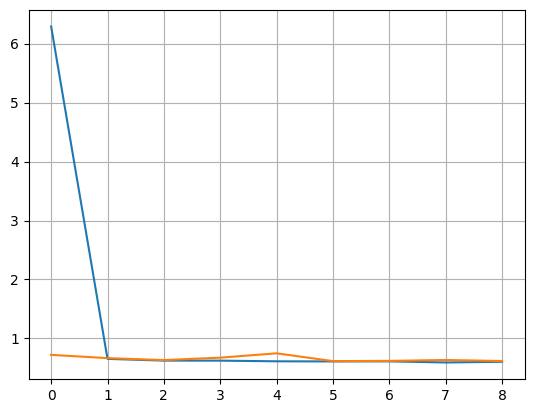

In [13]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
x = np.arange(len(loss))
plt.plot(x, loss)
plt.plot(x, val_loss)
plt.grid()
plt.show()

In [14]:
input[-7:]

,Tdew (degC),rh (%),VPmax (mbar),rho (g/m**3),T (degC)
Date Time,,,,,
2016-12-31 17:10:00,-4.63,64.53,6.71,1270.29,1.29
2016-12-31 18:10:00,-4.92,71.50,5.92,1278.14,-0.42
2016-12-31 19:10:00,-5.36,72.00,5.69,1280.70,-0.98
2016-12-31 20:10:00,-6.84,66.29,5.51,1281.87,-1.40
2016-12-31 21:10:00,-6.90,72.90,4.99,1288.02,-2.75
2016-12-31 22:10:00,-7.15,72.30,4.93,1288.03,-2.89
2016-12-31 23:10:00,-8.09,72.60,4.56,1292.41,-3.93


In [15]:
best_model.predict(ss.transform(input[-10:]).reshape(1, 10, 5))

1/1 [==============================] - 0s 30ms/step


array([[-4.5700083]], dtype=float32)

In [16]:
best_model.predict(ss.transform(input[-11:-1]).reshape(1, 10, 5))

1/1 [==============================] - 0s 27ms/step


array([[-3.1866088]], dtype=float32)

# 연속 이틀간의 기온 맞추기 Example

In [17]:
num_data = len(target)
print("num_data:", num_data)
time_step = 7
num_time_data = num_data - time_step - 1
print("num_time_data:", num_time_data)
test_size = 0.3
num_test = int(np.ceil((num_time_data) * 0.3))
print("num_test:", num_test)
num_train = num_time_data - num_test
print("num_train:", num_train)
train_index = num_train + time_step - 1
print("train_index:", train_index)
print()

num_data: 70067
num_time_data: 70059
num_test: 21018
num_train: 49041
train_index: 49047



In [18]:
#표준화
#표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(input[:train_index])
input_ss = ss.transform(input)
input_ss.shape

(70067, 5)

In [20]:
# 타임 데이터 구축
def split_xy(input, target, time_step, n_out):
    x, y = [], []
    for i in range(len(target)):
        end_time = i + time_step
        if end_time + n_out - 1 >= len(target):
            break
        x_temp = input[i:end_time]
        y_temp = target[end_time: end_time + n_out]
        x.append(x_temp)
        y.append(y_temp)
    return np.array(x), np.array(y)


x, y = split_xy(input_ss, target, time_step, 2)
print(x.shape, y.shape)

(70059, 7, 5) (70059, 2)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=False, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49041, 7, 5), (21018, 7, 5), (49041, 2), (21018, 2))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input((time_step, X_train.shape[2])))
model.add(GRU(256, activation="tanh", return_sequences=True))
model.add(GRU(128, activation="tanh"))
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(2))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
mc = ModelCheckpoint(filepath="best_model.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=100, epochs=20, callbacks=[es, mc])

Epoch 1/20
391/393 [============================>.] - ETA: 0s - loss: 5.3883 - mae: 1.2652
Epoch 1: val_loss improved from inf to 1.44492, saving model to best_model.hdf5
393/393 [==============================] - 12s 22ms/step - loss: 5.3746 - mae: 1.2638 - val_loss: 1.4449 - val_mae: 0.8707
Epoch 2/20
  7/393 [..............................] - ETA: 6s - loss: 1.4305 - mae: 0.8399

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


392/393 [============================>.] - ETA: 0s - loss: 1.3007 - mae: 0.7919
Epoch 2: val_loss improved from 1.44492 to 1.26508, saving model to best_model.hdf5
393/393 [==============================] - 8s 20ms/step - loss: 1.3015 - mae: 0.7921 - val_loss: 1.2651 - val_mae: 0.7863
Epoch 3/20
391/393 [============================>.] - ETA: 0s - loss: 1.2593 - mae: 0.7790
Epoch 3: val_loss improved from 1.26508 to 1.23305, saving model to best_model.hdf5
393/393 [==============================] - 8s 20ms/step - loss: 1.2592 - mae: 0.7791 - val_loss: 1.2330 - val_mae: 0.7661
Epoch 4/20
391/393 [============================>.] - ETA: 0s - loss: 1.2221 - mae: 0.7630
Epoch 4: val_loss did not improve from 1.23305
393/393 [==============================] - 8s 20ms/step - loss: 1.2218 - mae: 0.7629 - val_loss: 1.2904 - val_mae: 0.7775
Epoch 5/20
391/393 [============================>.] - ETA: 0s - loss: 1.2134 - mae: 0.7592
Epoch 5: val_loss did not improve from 1.23305
393/393 [==========

In [23]:
best_model.predict(X_test)
r2_score(y_test[:, 0], best_model.predict(X_test)[:, 0])

657/657 [==============================] - 2s 3ms/step


0.9897826195616675

In [24]:
r2_score(y_test[:, 1], best_model.predict(X_test)[:, 1])

657/657 [==============================] - 2s 3ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

In [25]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


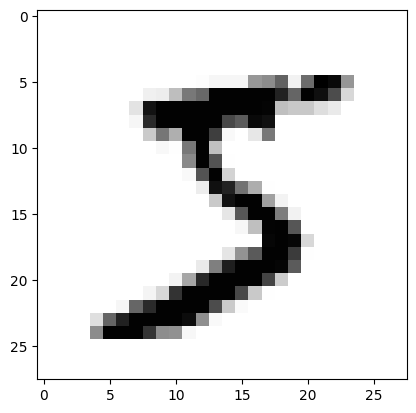

In [26]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="Greys")

In [27]:
y_train[0]

5

In [28]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
X_train.shape, y_train_onehot.shape, X_test.shape, y_test_onehot.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Input

model = Sequential()
model.add(Input((28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dropout (Dropout)           (None, 9216)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               1179776   
                                                      

In [30]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mc = ModelCheckpoint(filepath="best_model.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)
history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), batch_size=100, epochs=20,
                    callbacks=[es, mc])

Epoch 1/20
599/600 [============================>.] - ETA: 0s - loss: 0.3417 - accuracy: 0.9399
Epoch 1: val_loss improved from inf to 0.05703, saving model to best_model.hdf5
600/600 [==============================] - 32s 52ms/step - loss: 0.3413 - accuracy: 0.9399 - val_loss: 0.0570 - val_accuracy: 0.9805
Epoch 2/20
  3/600 [..............................] - ETA: 30s - loss: 0.0469 - accuracy: 0.9800

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


600/600 [==============================] - ETA: 0s - loss: 0.0771 - accuracy: 0.9766
Epoch 2: val_loss improved from 0.05703 to 0.04715, saving model to best_model.hdf5
600/600 [==============================] - 29s 49ms/step - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.0472 - val_accuracy: 0.9850
Epoch 3/20
599/600 [============================>.] - ETA: 0s - loss: 0.0589 - accuracy: 0.9815
Epoch 3: val_loss did not improve from 0.04715
600/600 [==============================] - 30s 50ms/step - loss: 0.0590 - accuracy: 0.9814 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 4/20
600/600 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9860
Epoch 4: val_loss improved from 0.04715 to 0.04272, saving model to best_model.hdf5
600/600 [==============================] - 31s 52ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0427 - val_accuracy: 0.9879
Epoch 5/20
600/600 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9874
Epoch 5: val_

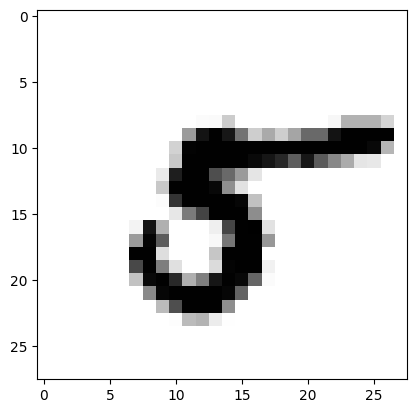

In [31]:
plt.imshow(X_test.squeeze()[-2:][0], cmap="Greys")

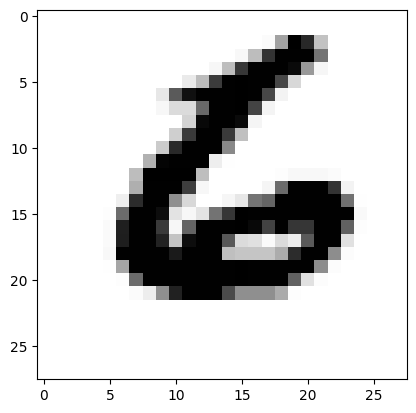

In [32]:
plt.imshow(X_test.squeeze()[-2:][1], cmap="Greys")

In [33]:
model.predict(X_test[-2:])[0].argmax()

1/1 [==============================] - 0s 58ms/step


5

In [34]:
model.predict(X_test[-2:])[1].argmax()

1/1 [==============================] - 0s 23ms/step


6

# day 단위 평균 기온 예측 :RNN 적용 시계열 예측

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input((7, 5)))
model.add(GRU(128, activation="tanh", return_sequences=True))
model.add(GRU(128, activation="tanh"))
model.add(Dense(128))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
mc = ModelCheckpoint(filepath="best_model.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=100, epochs=200, callbacks=[es, mc])

Epoch 1/200


ValueError: in user code:

    File "C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 7, 5), found shape=(100, 28, 28, 1)
